In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def loadDataSet(fileName, delim= '\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    #print stringArr[0]
    #a = map(float, stringArr[0])
    #print a, type(a)
    dataArr = [map(float, line) for line in stringArr]
    return np.array(dataArr)

def pca(dataArr, topNfeat = 9999999):
    m,n = dataArr.shape
    meanVals = np.mean(dataArr, axis = 0)
    meanRemoved = dataArr - meanVals  # meanRemoved的每一行是一个样本，所以rowvar要为false
#     covMat = np.cov(meanRemoved, rowvar = 0)

    covMat = meanRemoved.T.dot(meanRemoved) 
    eigVals, eigVects = np.linalg.eig(covMat)
    print eigVals
    eigValInd = np.argsort(eigVals) 
    print eigValInd, eigVects
    eigValInd = eigValInd[-(topNfeat):]  
    
    redEigVects = eigVects[:, eigValInd]
    print redEigVects, redEigVects.shape

#     lowDDataMat = np.dot(meanRemoved, redEigVects)
#     reconMat = np.dot(lowDDataMat, redEigVects.T) + meanVals

    lowDDataMat = redEigVects.T.dot(meanRemoved.T)
    print lowDDataMat.shape
    
    return lowDDataMat, reconMat

def my_pca(dataArr, topNfeat = 9999):
    m, n = dataArr.shape
    
    meanVals = np.mean(dataArr, axis=0, keepdims=True)
    meanRemoved = dataArr - meanVals
    
    covMat = meanRemoved.T.dot(meanRemoved)
    eigVals, eigVects = np.linalg.eig(covMat)
    print eigVals
    print eigVects
    eigValInd = np.argsort(eigVals)[::-1]
    eigVects = eigVects[:, eigValInd]
    print eigVects
    
    lowDDataMat = (eigVects[:, :topNfeat]).T.dot(meanRemoved.T).T
    print lowDDataMat.shape
    reconMat = eigVects.dot(np.concatenate((lowDDataMat, np.zeros((lowDDataMat.shape[0], 1))), axis=1).T ).T + meanVals
    print reconMat.shape
    return lowDDataMat, reconMat

[  366.14719496  2894.23782122]
[[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
[[-0.52045195 -0.85389096]
 [-0.85389096  0.52045195]]
(1000, 1)
(1000, 2)


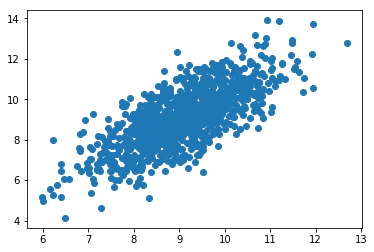

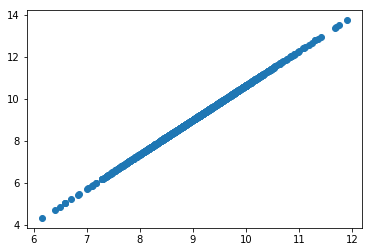

In [65]:
dataArr = loadDataSet('testSet.txt')
lowDDataMat, reconMat = my_pca(dataArr, 1)
plt.figure()
plt.plot(dataArr[:, 0], dataArr[:, 1],'o')
plt.show()

plt.figure()
plt.plot(reconMat[:, 0], reconMat[:, 1], 'o')
plt.show()

[  366.14719496  2894.23782122]
[0 1]
(1000, 2)


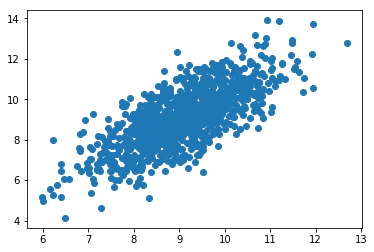

In [21]:
lowDDataMat1, reconMat1 = pca(dataArr, 2)
plt.figure()
plt.plot(reconMat1[:, 0], reconMat1[:, 1],'o')
plt.show()

In [ ]:
def replaceNanWithMean():
    dataArr = loadDataSet('secom.data', ' ')
    m, n = dataArr.shape
    for i in range(n):
        #meanVal = np.mean( dataArr[np.nonzero( ~np.isnan(dataArr[:, i]) )[0], i] )
        #dataArr[np.nonzero(np.isnan(dataArr[:, i]))[0], i] = meanVal
        meanVal = np.mean( dataArr[ ~np.isnan(dataArr[:, i]), i] )
        dataArr[ np.isnan(dataArr[:, i]), i] = meanVal
    return dataArr

In [ ]:
dataArr = replaceNanWithMean()

In [ ]:
meanVals = np.mean(dataArr, axis = 0)
meanRemoved = dataArr - meanVals
covMat = np.cov(meanRemoved, rowvar = 0)
eigVals, eigVects = np.linalg.eig(covMat)

In [ ]:
################################